This notebook experiments with constructing different sets of noise

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from src.bluenoise import generate_blue_noise_texture, filter_void_and_cluster_blue_noise_textures
from src.bluenoise import poisson_disc_scipy, poisson_disc_scipy_pixel_dist
from src.noise import generate_coloured_noise, generate_phase_only_noise, analyze_power_spectrum

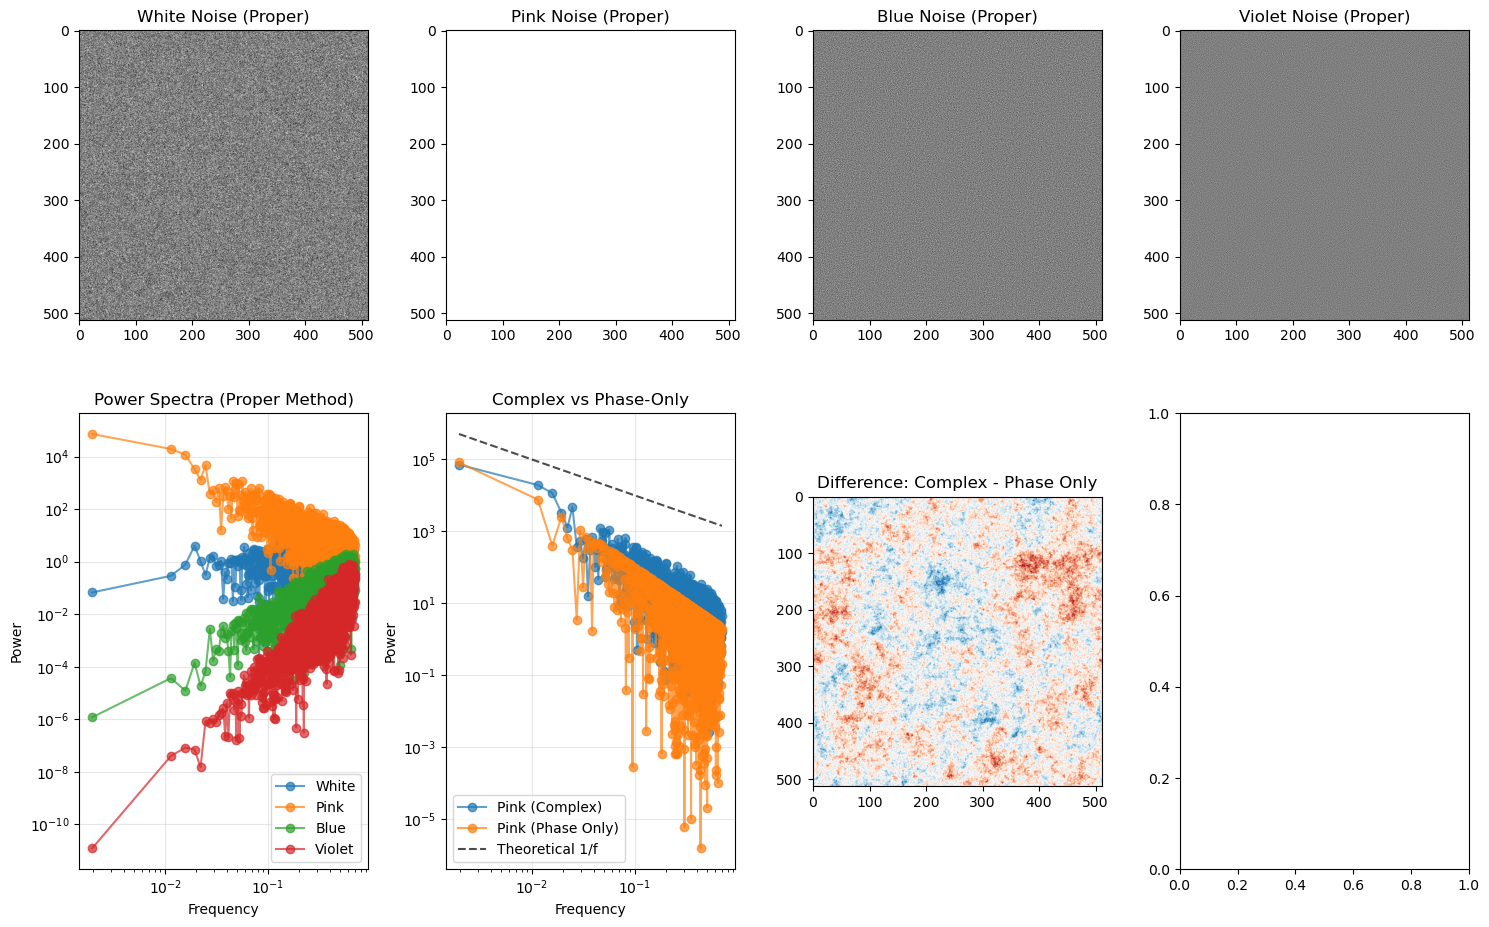

Standard deviations (showing relative power):
White: 0.002
Pink:  0.011
Blue:  0.001
Pink (phase only): 0.008


In [ ]:
# Define some noise parameters
def white_spectrum(f):
    return np.ones_like(f)

def blue_spectrum(f):
	return f

def pink_spectrum(f):
	f_safe = np.maximum(f, 1e-6)
	return 1 / f_safe

def violet_spectrum(f):
	return f ** 2

shape = (512, 512)
#phase = np.random.rand(shape[0], shape[1]) * 2 * np.pi

#white_noise = generate_white_noise(phase)
#blue_noise = generate_coloured_noise(shape, phase, blue_spectrum)
#pink_noise = generate_coloured_noise(shape, phase, pink_spectrum)
#violet_noise = generate_coloured_noise(shape, phase, violet_spectrum)

np.random.seed(42)  # For reproducibility

# Proper complex method
white_proper = generate_coloured_noise(shape, white_spectrum)
pink_proper = generate_coloured_noise(shape, pink_spectrum)
blue_proper = generate_coloured_noise(shape, blue_spectrum)
violet_proper = generate_coloured_noise(shape, violet_spectrum)

# Phase-only method (your original)
pink_phase_only = generate_phase_only_noise(shape, pink_spectrum)

# Analyze power spectra
f_white, p_white = analyze_power_spectrum(white_proper)
f_pink, p_pink = analyze_power_spectrum(pink_proper)
f_blue, p_blue = analyze_power_spectrum(blue_proper)
f_violet, p_violet = analyze_power_spectrum(violet_proper)
f_pink_phase, p_pink_phase = analyze_power_spectrum(pink_phase_only)

# Create comparison plot
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Visual comparison
axes[0, 0].imshow(white_proper, cmap='gray', vmin=-3*np.std(white_proper), vmax=3*np.std(white_proper))
axes[0, 0].set_title('White Noise (Proper)')
vmin_pink = np.percentile(pink_proper, 1)
vmax_pink = np.percentile(pink_proper, 99)
axes[0, 1].imshow(pink_proper, cmap='gray', vmin=vmin_pink, vmax=vmax_pink)
axes[0, 1].set_title('Pink Noise (Proper)')
axes[0, 2].imshow(blue_proper, cmap='gray', vmin=-3*np.std(blue_proper), vmax=3*np.std(blue_proper))
axes[0, 2].set_title('Blue Noise (Proper)')
axes[0, 3].imshow(violet_proper, cmap='gray', vmin=-3*np.std(violet_proper), vmax=3*np.std(violet_proper))
axes[0, 3].set_title('Violet Noise (Proper)')


# Power spectrum comparison
axes[1, 0].loglog(f_white[::100], p_white[::100], 'o-', alpha=0.7, label='White')
axes[1, 0].loglog(f_pink[::100], p_pink[::100], 'o-', alpha=0.7, label='Pink')
axes[1, 0].loglog(f_blue[::100], p_blue[::100], 'o-', alpha=0.7, label='Blue')
axes[1, 0].loglog(f_violet[::100], p_violet[::100], 'o-', alpha=0.7, label='Violet')

axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Power')
axes[1, 0].set_title('Power Spectra (Proper Method)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Theoretical vs actual comparison for pink noise
axes[1, 1].loglog(f_pink[::100], p_pink[::100], 'o-', alpha=0.7, label='Pink (Complex)')
axes[1, 1].loglog(f_pink_phase[::100], p_pink_phase[::100], 'o-', alpha=0.7, label='Pink (Phase Only)')
# Theoretical 1/f line
f_theory = f_pink[::100]
p_theory = 1000 / f_theory  # Scaled for visibility
axes[1, 1].loglog(f_theory, p_theory, 'k--', alpha=0.7, label='Theoretical 1/f')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_ylabel('Power')
axes[1, 1].set_title('Complex vs Phase-Only')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Show visual difference between methods
axes[1, 2].imshow(pink_proper - pink_phase_only, cmap='RdBu')
axes[1, 2].set_title('Difference: Complex - Phase Only')

plt.tight_layout()
plt.show()

# Print some statistics
print("Standard deviations (showing relative power):")
print(f"White: {np.std(white_proper):.3f}")
print(f"Pink:  {np.std(pink_proper):.3f}")
print(f"Blue:  {np.std(blue_proper):.3f}")
print(f"Pink (phase only): {np.std(pink_phase_only):.3f}")